In [59]:
library(MASS)
library(data.table)
library(dplyr)

# STAT 5310 – Regression Analysis
# Lab Exercise/Homework 2

## 1. 
Develop a regression model to predict the average number of hits (Y) from the average salary for the 10 highest paid hitters from each MLB team (X) based on data from the 2013 season.

The data is in the file Hitters

In [60]:
hitters <- fread('https://raw.githubusercontent.com/wilsonify/AppliedRegression/master/data/Hitters.csv')

In [61]:
names(hitters) <- names(hitters) %>% gsub('[ |(|)|$]','',.)

In [62]:
hitters %>% head()

Team,AverageNumberofHits,AverageSalary2013M,NewYorkYankees
Marlins,41,1.340,0
Mariners,51,3.290,0
Astros,57,0.759,0
Mets,61,2.680,0
Pirates,61,3.090,0
Padres,59,3.370,0


### a) 
Fit a straight line regression model between Y and X.  

Decide whether $\beta_1$, the coefficient of X, is statistically significantly different from zero or not.  

Give a reason to support your answer.

In [63]:
fit <- lm(hitters$AverageNumberofHits ~ hitters$AverageSalary2013M)
summary_of_fit <- summary(fit)
summary_of_fit$coefficients["hitters$AverageSalary2013M","Pr(>|t|)"]

[1] 0.1328928

$\beta_1$ is not significatnly different from zero.

Under the null hypothesis that $\beta_1 = 0$, we would observe a more extreme $\beta_1$ 13% of the time.

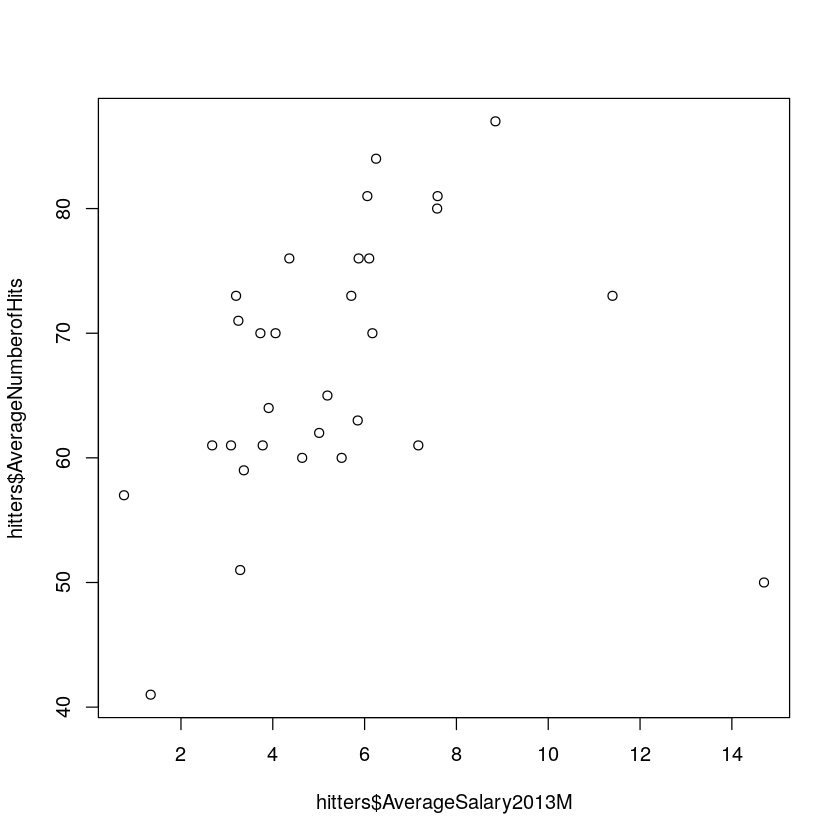

In [64]:
plot( y = hitters$AverageNumberofHits
     ,x = hitters$AverageSalary2013M
    )

### b) 
Examine the studentized residuals for the fitted model in part a.  

Identify any points which are outliers (that is, have studentized residuals values more extreme than 3.

In [68]:
studentized_residuals <- studres(fit)

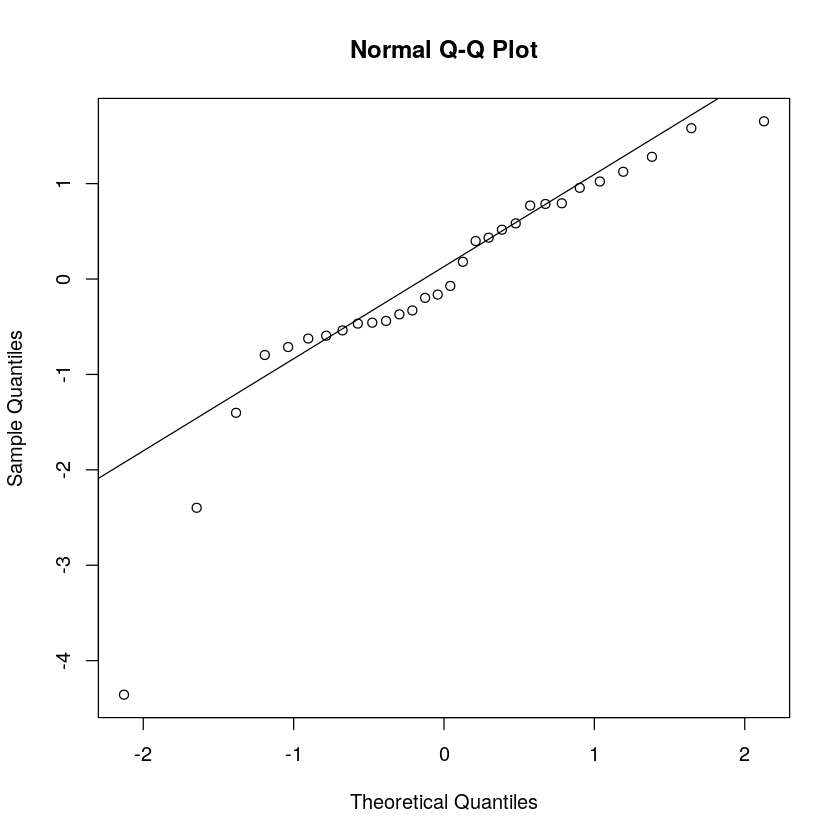

In [72]:
qqnorm(studentized_residuals)
qqline(studentized_residuals)

There is exactly one outlier with studentized residual of -4.36

## 2. 
In order to investigate the feasibility of starting a Sunday edition for a large metropolitan newspaper, information was obtained from a sample of 34 newspapers concerning their daily and Sunday circulations (in thousands) 

The data is in the file Newspaper.

 *(Source:  Gale Directory of Publications, 1994).*


In [76]:
newspaper <- fread('https://raw.githubusercontent.com/wilsonify/AppliedRegression/master/data/Newspaper.csv')

In [77]:
newspaper %>% head()

Newspaper,Daily,Sunday
Baltimore Sun,391.952,488.506
Boston Globe,516.981,798.298
Boston Herald,355.628,235.084
Charlotte Observer,238.555,299.451
Chicago Sun Times,537.780,559.093
Chicago Tribune,733.775,1133.249


### a)
Construct a scatter plot of Sunday circulation versus daily circulation.

Does the plot suggest a linear relationship between daily and Sunday circulation?  

Do you think this is a plausible relationship?

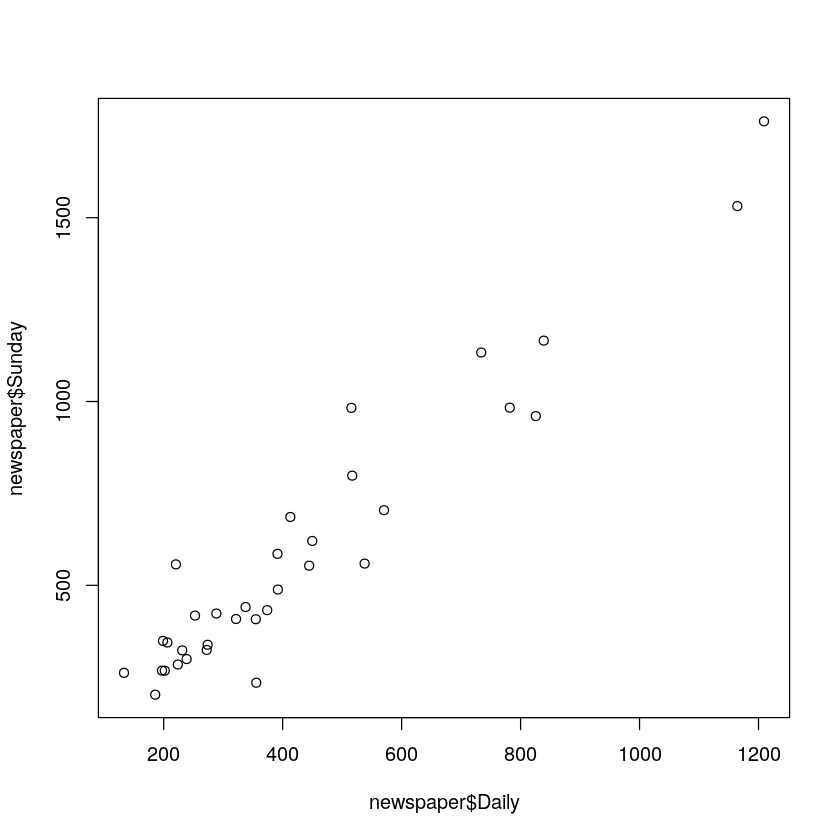

In [78]:
plot(y=newspaper$Sunday,x=newspaper$Daily)

The plot of sunday circualtion vs daily circulation does suggest a linear relationship.

It seems very plausible that, in reality, newspapers with a large circulation on weekdays would also have a large circulation on sunday and vis-versa for newspapers with a small circulation.

### b)
Fit a regression line predicting Sunday circulation from daily circulation.

In [79]:
fit <- lm(data =newspaper, Sunday~Daily)

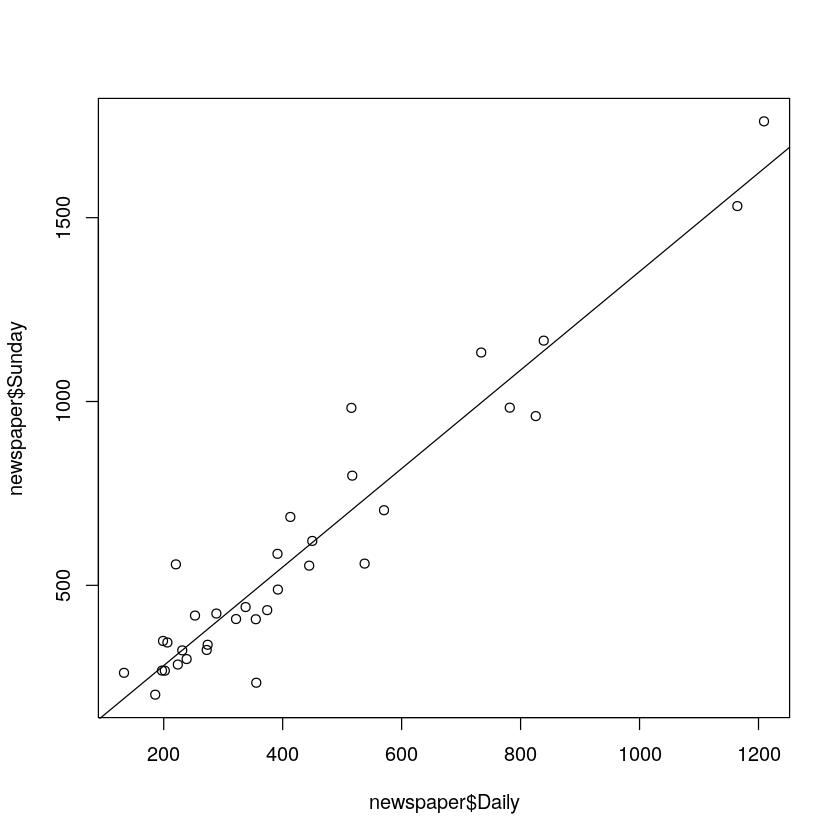

In [80]:
plot(y=newspaper$Sunday,x=newspaper$Daily)
abline(fit)

### c)
Obtain the 95% confidence intervals for β0 and β1.

In [105]:
summary_of_fit <- summary(fit)
summary_of_fit$coefficients
alpha = 1.0 - 0.95
half_alpha = alpha / 2.0
z = qnorm(1-half_alpha)


beta0_center <- summary_of_fit$coefficients["(Intercept)","Estimate"]
beta0_SE <- summary_of_fit$coefficients["(Intercept)","Std. Error"]
beta0_error_bound <- z * beta0_SE
beta0_CI <- c(beta0_center-beta0_error_bound,beta0_center+beta0_error_bound) %>% round(2)
print("95% confidence interval for the intercept, B0 is ")
beta0_CI

beta1_center <- summary_of_fit$coefficients["Daily","Estimate"]
beta1_SE <- summary_of_fit$coefficients["Daily","Std. Error"]
beta1_error_bound <- z * beta1_SE
beta1_CI <- c(beta1_center-beta1_error_bound,beta1_center+beta1_error_bound) %>% round(2)
print("95% confidence interval for the slope, B1 is ")
beta1_CI

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),13.835630,35.80400579,0.3864269,7.017382e-01
Daily,1.339715,0.07075395,18.9348403,6.016802e-19


[1] "95% confidence interval for the intercept, B0 is "


[1] -56.34  84.01

[1] "95% confidence interval for the slope, B1 is "


[1] 1.20 1.48

### d) 
Is there a significant relationship between Sunday circulation and daily circulation?

Justify your answer by a statistical test.

Indicate what hypothesis you are testing and your conclusion.

There a significant relationship between Sunday circulation and daily circulation.

If there were no relationship (H0: $\beta_1 = 0$), we would expect a more extreme coefficient only 0.00000000000000006% of the time.

### e)
What proportion of the variability in Sunday circulation is accounted for by daily circulation?

In [112]:
summary_of_fit$adj.r.squared

[1] 0.9154991

91.5% of the variablitity in sunday ciculation can be explained by a linear relashionship between daily circulation and sunday circulation.

### f)
Provide an estimate (based on a 95% confidence level) for the average Sunday circulation of newspapers with daily circulation of 500,000.

In [137]:
alpha = 1.0 - 0.95
half_alpha = alpha / 2.0
z = qnorm(1-half_alpha)
newdata <- data.frame(Daily=c(500000))
center <- predict(fit, newdata = newdata)
sigma <- summary_of_fit$sigma
error_bound <- z * sigma
CI <- c(center-error_bound,center+error_bound)
CI

1        1 
669656.8 670085.7

At a 95% confidence level, the average Sunday circulation of all newspapers with daily circulation of 500,000 will be between 669700 and 670100.

### g)
The particular newspaper that is considering a Sunday edition has a daily circulation of 500,000.  

Provide an interval estimate (based on a 95% confidence level) for the predicted Sunday circulation of this paper.

How does this interval differ from that given in part f?

In [125]:
predict(fit, newdata = data.frame(Daily=c(500000)), interval="predict",level = 0.95) 

,fit,lwr,upr
1,669871.2,597872.4,741870


At a 95% confidence level, the Sunday circulation of a particular newspaper with daily circulation of 500,000 will be between 598000 and 742000.

Generally, there is more (tighter) confidence in predicting the average of all newspapers than in predicting the circulation of a particular newspaper.

### h)
Another newspaper considering a Sunday edition has a daily circulation of 2,000,000.

Provide an interval estimate for the predicted Sunday circulation for this paper?

How does this interval compare with the one given in part g?  

Do you think it is likely to be accurate?

In [138]:
predict(fit, newdata = data.frame(Daily=c(2000000)), interval="predict",level = 0.95) 

,fit,lwr,upr
1,2679443,2391263,2967623


At a 95% confidence level, the Sunday circulation of a particular newspaper with daily circulation of 200,000,000 will be between 2,400,000 and 2,970,000.

This is a wider interval than predicting at 500,000 in part g. 

Generally, the further from the average, less confidence in predicting.

## 3.
Consider the sale price of 1672 residential properties in Ames, Iowa from 2006 to 2010.  

The data included information from the Tax Assessor’s Office along with information on various aspects of each property.

The first model fit to the data was

$ SalePrice = \beta_0 + \beta_1 TotalLivingArea + e $

Where TotalLivingArea gives the total area in square feet of the above ground living area and basement for each property. 

On the following pages is some output from fitting the first model as well as some plots.

a. Interpret the estimated coefficient of TotalLivingArea in model (1).

b. Carefully describe at least one main shortcomings (apart from outliers) evident in model (1).

## 4.

Consider the situation in which 3 regression models of the following form have been fit to a set of data.

Suppose that we are modeling the sale prices of apartments in Austin, TX.

Model (A) is such that y = sale price, x = number of bedrooms 

model (B) is such that y = sale price, x = number of bathrooms 

model (C) is such that y = log(sale price), x = number of bedrooms

Comparing the models, which one of the following statements is true? 

I. It is reasonable to compare the R2 values for models (A), (B) and (C).

II. It is reasonable to compare the R2 values only for models (A) and (B

III. It is reasonable to compare the R2 values only for models (A) and (C).

IV. It is not reasonable to compare the R2 values for models (A), (B), and (C).

Give a reason to support your answer.